In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [4]:
# Load dataset
df = pd.read_csv("/content/trash data.csv")

In [3]:
# --- Data Cleaning ---

df['FILL PERCENTAGE'] = (
    df['FILL PERCENTAGE']
    .str.replace('%', '', regex=False)
)
df['FILL PERCENTAGE'] = pd.to_numeric(df['FILL PERCENTAGE'], errors='coerce')


In [5]:
# Clean and convert BATTERY LEVEL
df['BATTERY LEVEL '] = (
    df['BATTERY LEVEL ']
    .str.replace('%', '', regex=False)
)
df['BATTERY LEVEL '] = pd.to_numeric(df['BATTERY LEVEL '], errors='coerce')

df['TEMPERATURE( IN ⁰C)'] = (
    df['TEMPERATURE( IN ⁰C)']
    .astype(str)
    .str.replace('ᵒ', '', regex=False)  # remove special unicode superscript o
    .str.replace('°', '', regex=False)  # remove standard degree symbol just in case
)
df['TEMPERATURE( IN ⁰C)'] = pd.to_numeric(df['TEMPERATURE( IN ⁰C)'], errors='coerce')

df['FILL LEVEL(IN LITRES)'] = pd.to_numeric(df['FILL LEVEL(IN LITRES)'], errors='coerce')

df['LATITUDE'] = df['LATITUDE'].astype(str).str.replace('° N', '', regex=False)
df['LATITUDE'] = pd.to_numeric(df['LATITUDE'], errors='coerce')

df['LONGITUDE'] = df['LONGITUDE'].astype(str).str.replace('° E', '', regex=False)
df['LONGITUDE'] = pd.to_numeric(df['LONGITUDE'], errors='coerce')

df.dropna(subset=[
    'FILL PERCENTAGE', 'BATTERY LEVEL ', 'TEMPERATURE( IN ⁰C)',
    'FILL LEVEL(IN LITRES)', 'LATITUDE', 'LONGITUDE',
    'FILL LEVEL INDICATOR(Above 550)'
], inplace=True)

In [6]:
# Convert date and time to datetime
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['TIME'])

<ipython-input-6-808237654da9>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['TIME'])


In [7]:
# Extract datetime features
df['Hour'] = df['DateTime'].dt.hour
df['DayOfWeek'] = df['DateTime'].dt.dayofweek
df['Month'] = df['DateTime'].dt.month

In [8]:
# Encode LOCATION
df['LOCATION '] = pd.factorize(df['LOCATION '])[0]

In [9]:
# Encode target variable
df['FILL LEVEL INDICATOR(Above 550)'] = df['FILL LEVEL INDICATOR(Above 550)'].map({'TRUE': 1, 'FALSE': 0})

In [10]:
# --- Feature Selection ---
features = [
    'WEEK NO', 'FILL LEVEL(IN LITRES)', 'TOTAL(LITRES)', 'FILL PERCENTAGE',
    'LOCATION ', 'LATITUDE', 'LONGITUDE', 'TEMPERATURE( IN ⁰C)',
    'BATTERY LEVEL ', 'Hour', 'DayOfWeek', 'Month'
]
X = df[features]
y = df['FILL LEVEL INDICATOR(Above 550)']


In [18]:
# --- Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Model Training ---
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# --- Prediction & Evaluation ---
y_pred = model.predict(X_test)


In [19]:
# --- Metrics ---
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

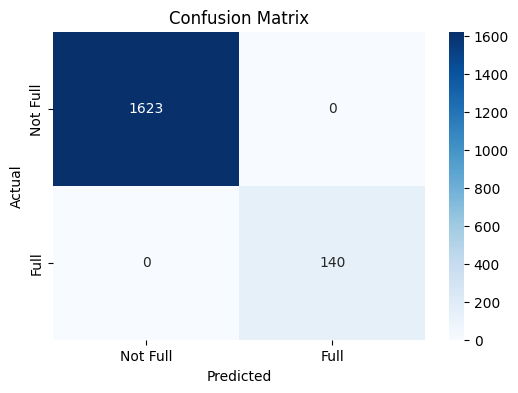

=== Trash Bin Level Classification ===

Confusion Matrix:
 [[1623    0]
 [   0  140]]

Precision: 1.00
Recall: 1.00
Accuracy: 1.00
F1-Score: 1.00

Detailed Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1623
           1       1.00      1.00      1.00       140

    accuracy                           1.00      1763
   macro avg       1.00      1.00      1.00      1763
weighted avg       1.00      1.00      1.00      1763



In [20]:
# --- Display Results ---

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Full', 'Full'], yticklabels=['Not Full', 'Full'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("=== Trash Bin Level Classification ===")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nPrecision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("Accuracy: {:.2f}".format(accuracy))
print("F1-Score: {:.2f}".format(f1))
print("\nDetailed Classification Report:\n", classification_report(y_test, y_pred))